# Blazars/Non-Blazars (AGNs) Samples Definition

### These notebook is to define the samples of sed data of blazars and non-blazar objects for future training of the neural network.

A list of name of sources is obtained for the blazar dataset (4627 from the OU4v2 catalog) and a list of ra dec for agns (4093 from the mqv7.2 catalog).

These lists will be given as input to the online SED Builder tool (ASI-SSDC) to get the files with the sed data.

In [1]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
print(pd.__version__)

import numpy as np
print(np.__version__)

import os

1.4.1
1.18.5


In [2]:
blcatalog = 'OU4Bl_v2.csv'
agncatalog = 'milliquasv7.2.txt'

In [3]:
%ls

3hsp.csv              OU4Bl_v2.csv
Check_run_VOUB.ipynb  preparationSED_BUILDERdata.ipynb
data/                 preparationVOUBdata.ipynb
milliquasv7.2.txt


# Blazar sample

In [4]:
ou4bl = pd.read_csv(blcatalog, encoding='utf-8-sig')
ou4bl.sample(10)

,id,Source name,R.A.,Dec,Radio flux d.,Fermi flux,Log nu_peak,Redshift,Original catalog
4017,4018,5BZBJ1442+1200,14 42 48.27,+12 00 40.21,69.0,6.140000e-12,17.7,0.163,5BZCAT
2063,2064,5BZQJ0833+4224,08 33 53.88,+42 24 01.9,249.0,6.590000e-12,0.0,0.249,5BZCAT
3298,3299,5BZQJ1231+0418,12 31 27.59,+04 18 01.9,339.0,0.000000e+00,0.0,1.030,5BZCAT
4816,4817,5BZBJ1742+5945,17 42 31.98,+59 45 06.8,106.0,4.850000e-12,0.0,0.000,5BZCAT
5263,5264,3HSPJ202630.7+764448.3,20 26 30.78,+76 44 48.3,6.4,1.920000e-12,16.6,0.290,3HSP
1458,1459,5BZQJ0550-5732,05 50 09.54,-57 32 24.21,368.0,1.890000e-12,0.0,2.001,5BZCAT
2787,2788,5BZBJ1101+4108,11 01 24.72,+41 08 47.4,21.0,2.770000e-12,15.6,0.000,5BZCAT
5276,5277,5BZQJ2031+5455,20 31 47.94,+54 55 03.1,1154.0,0.000000e+00,0.0,1.262,5BZCAT
1767,1768,5BZQJ0732+2548,07 32 56.28,+25 48 38.69,482.0,0.000000e+00,0.0,1.443,5BZCAT
4508,4509,5BZQJ1623+6624,16 23 04.5,+66 24 01.11,155.0,0.000000e+00,0.0,0.201,5BZCAT


In [5]:
# convert coordinates
def sex2deg(ra,dec):
    h,m,s = list(map(float,ra.split()))
    ra = s / 86400
    ra += m / 1440
    ra += h / 24
    ra *= 360
    
    d,m,s = dec.split()
    dec = float(s) / 3600
    dec += float(m) / 60
    if d[0] == '-':
        dec = float(d) - dec
    else:
        dec = float(d) + dec
    
    return ra,dec

In [6]:
RA_COL = 'R.A.'
DEC_COL = 'Dec'
def apply_df(df):
    try:
        bla = list(sex2deg(df[RA_COL],df[DEC_COL]))
    except:
        bla = [None,None]
    return bla

ou4bl[['RA','DEC']] = ou4bl.apply(apply_df, axis=1, result_type = 'expand')

In [7]:
ou4bl.head()

,id,Source name,R.A.,Dec,Radio flux d.,Fermi flux,Log nu_peak,Redshift,Original catalog,RA,DEC
0,1,3HSPJ000236.0-081532.4,00 02 36.06,-08 15 32.4,29.0,0.000000e+00,16.0,0.390,3HSP,0.650250,-8.259000
1,2,5BZBJ0002-0024,00 02 57.16,-00 24 47.01,178.0,0.000000e+00,0.0,0.523,5BZCAT,0.738167,-0.413058
2,3,4FGLJ0003.3-5905,00 03 13.32,-59 05 47.61,505.9,1.680000e-12,0.0,0.000,Fermi 4LAC,0.805500,-59.096558
3,4,4FGLJ0003.3-1928,00 03 18.66,-19 27 22.28,171.0,2.590000e-12,0.0,0.000,Fermi 4LAC,0.827750,-19.456189
4,5,5BZQJ0003+2129,00 03 19.32,+21 29 44.48,83.0,0.000000e+00,0.0,0.450,5BZCAT,0.830500,21.495689


In [8]:
ou4bl.columns

Index(['id', 'Source name', 'R.A.', 'Dec', 'Radio flux d.', 'Fermi flux',
       'Log nu_peak', 'Redshift', 'Original catalog', 'RA', 'DEC'],
      dtype='object')

In [9]:
# Description of the Blazars in the catalog
ou4bl.groupby('Original catalog').size().sort_values(ascending=False)

Original catalog
5BZCAT        3561
3HSP          1353
Fermi 4LAC     748
Fermi 3LAC     415
dtype: int64

In [10]:
# define the colums of interest
col = dict(idn='id',
           ra='RA',
           dec='DEC',
           name='Source name',
           redshift='Redshift',
           flux_radio='Radio flux d.',
           fermi_flux='Fermi flux',
           nupk='Log nu_peak',
           catalog='Original catalog'
          )

#### 4LAC, 3LAC data absent in SED Builder so I select only 5BZCAT and 3HSP

In [11]:
ou4bl_3HSP = ou4bl.loc[ou4bl[col['catalog']] == '3HSP']
ou4bl_3HSP = ou4bl_3HSP[list(col.values())]
ou4bl_5BZCAT = ou4bl.loc[ou4bl[col['catalog']] == '5BZCAT']
ou4bl_5BZCAT = ou4bl_5BZCAT[list(col.values())]
# join the two df in order to have my complete list of blazars
mybl_list = pd.concat([ou4bl_3HSP, ou4bl_5BZCAT], ignore_index=True)

In [12]:
# Composition of the Blazars set
mybl_list.groupby(col['catalog']).size().sort_values(ascending=False)

Original catalog
5BZCAT    3561
3HSP      1353
dtype: int64

### SED Builder: problems with recognition of 3HSP source names present in the OU4 catalog

#### Downloaded the 3HSP catalogue directly and purged it of the sources already present in 5BZcat


In [13]:
cat3hsp=pd.read_csv('3hsp.csv',encoding='utf-8-sig')

In [14]:
cat3hsp.head()

,id,3HSP Source name,BZcat name,R.A.,Dec,NVSS/FIRSTflux density(mJy),X-ray flux d. @ 1keV (μJy),Log(peak flux),γ-ray counterpart,Fermi γ-ray slope,2WHSP name
0,1,3HSPJ000116.4+293534,NaN,0.31821,29.59278,4.0,NaN,-12.9?,NaN,NaN,2WHSPJ000116.3+293534
1,2,3HSPJ000117.1-315043,NaN,0.32117,-31.84528,7.2,0.23,-12.3?,NaN,NaN,2WHSPJ000116.9-315043
2,3,3HSPJ000132.7-415525,NaN,0.38642,-41.92361,13.2,0.34,-11.7,4FGL J0001.6-4156,2.09,2WHSPJ000132.6-415524
3,4,3HSPJ000158.1-115047,NaN,0.49225,-11.84639,3.3,0.11,-12.5,NaN,NaN,2WHSPJ000158.0-115047
4,5,3HSPJ000215.2-672653,NaN,0.56329,-67.44806,21.4,0.27,-11.8,4FGL J0002.1-6728,1.95,2WHSPJ000215.1-672653


In [15]:
#select dataframe rows not present in the 5BZcat catalog
my_3hsp = cat3hsp.loc[cat3hsp['BZcat name'].isnull()]
my_3hsp.shape

(1356, 11)

In [16]:
name_my3hsp=my_3hsp['3HSP Source name']

In [17]:
# The SED Builder does not recognise many 3HSP names when I give them as input.
# switch to the 2WHSP catalogue, removing the "NaN" lines

my_2whsp = my_3hsp.loc[my_3hsp['2WHSP name'].notnull()]
my_2whsp.shape

(1072, 11)

In [ ]:
# There were 1356 non-BZcat 3HSPs. Selecting sources with the name 2WHSP drops us to 1072 sources:
# Lost 284 blazars
whsp_name=my_2whsp['2WHSP name']
whsp_name.to_csv('my2whsp_name.csv', encoding='utf-8-sig', index=False, header=None)

In [18]:
# In total, my Blazar data set for the SED Builder contains 4633 sources (3561 BZCAT + 1072 2WHSP).
ou4bl_5BZCAT.to_csv("5bzcat_list.csv", encoding='utf-8-sig', index=False)
my_2whsp.to_csv("2whsp_list.csv", encoding='utf-8-sig', index=False)

# AGNs Sample

In [19]:
agns_v72 = pd.read_csv(agncatalog, encoding='utf-8-sig', delimiter = '|')
agns_v72.sample(10)

,RAJ2000,DEJ2000,Name,Type,Rmag,Bmag,Comment,R,B,z,Qpct,XName,RName,Lobe1,Lobe2
543228,136.155855,32.660010,SDSS J090437.40+323936.0,Q,20.79,21.30,g,1,1,3.320,,,,,NaN
1387028,321.695944,-3.012083,J212647.02-030043.5,R,21.94,22.36,g,-,-,,65,,FIRST J212646.9-030045,,NaN
1415335,329.518422,30.433277,SDSS J215804.42+302559.7,Q,19.58,20.74,p+,1,-,1.632,,,,,NaN
1516627,350.311579,3.841998,SDSS J232114.77+035031.2,QR,21.38,21.63,gG,-,-,0.891,99,,VL0J232114.77+035031.3,FIRST J232114.7+035031,NVSS J232114.5+035030
18425,2.995188,-55.887946,WISEA J001158.82-555316.5,q,18.77,19.21,jG,-,-,1.300,100,,,,NaN
654063,154.090784,3.558019,SDSS J101621.78+033328.8,Q,21.18,21.54,g,-,-,2.620,,,,,NaN
644602,152.542461,50.486171,SDSS J101010.19+502910.2,Q,20.99,21.54,gG,-,-,1.114,,,,,NaN
66829,10.699919,-0.490076,SDSS J004247.98-002924.2,Q,22.90,22.64,g,-,-,2.080,,,,,NaN
1277459,257.139947,59.514384,WISEA J170833.47+593051.6,q,20.34,20.50,pG,1,-,1.500,100,,,,NaN
19175,3.120589,1.392005,PGC 1193502,A,15.69,18.23,p+G,1,1,0.093,,,,,NaN


In [20]:
agns_v72.columns

Index(['RAJ2000', 'DEJ2000', 'Name', 'Type', 'Rmag', 'Bmag', 'Comment', 'R',
       'B', 'z', 'Qpct', 'XName', 'RName', 'Lobe1', 'Lobe2'],
      dtype='object')

In [21]:
agns_v72.groupby('Type').size().sort_values(ascending=False)

Type
Q       707379
q       478297
X        83737
R        52371
QX       50952
qX       46025
qR       29917
N        25773
QR       24446
A        24114
AX        8100
K         4522
AR        4421
NR        4117
QRX       4093
2         3928
QR2       2150
qRX       2100
RX        1870
NX        1843
ARX       1831
R2        1786
qR2       1785
BRX       1658
q2         972
QR2X       877
BR         781
Q2         715
NRX        635
KX         524
qR2X       248
KR         174
NR2        165
Q2X        164
AR2X       150
AR2        145
R2X        142
N2         133
BX         106
2X          90
A2          87
q2X         80
BR2X        68
B           51
L           50
KRX         49
NR2X        43
A2X         42
BR2         27
KR2         18
K2          18
N2X         17
LX          10
B2X          8
KR2X         6
K2X          5
B2           5
LRX          3
LR           1
dtype: int64

In [22]:
# I select the type "QRX": QSO type-I broad-line core-dominated with Radio and X association (4093)
agns_qrx = agns_v72.loc[agns_v72['Type'].str.strip() == 'QRX']
agns_qrx.head()

,RAJ2000,DEJ2000,Name,Type,Rmag,Bmag,Comment,R,B,z,Qpct,XName,RName,Lobe1,Lobe2
1343,0.212906,11.236500,SDSS J000051.09+111411.2,QRX,17.16,17.99,pG,-,-,0.865,99,2RXS J000051.2+111422,FIRST J000051.0+111411,VL0J000051.07+111411.6,NaN
1520,0.240825,29.710146,SDSS J000057.79+294236.4,QRX,20.10,20.11,gG,-,-,0.760,100,2RXS J000058.1+294227,VL0J000057.78+294236.5,NVSS J000058.1+294237,2RXP J000058.5+294234
1787,0.285889,19.242694,TEX 2358+189,QRX,20.50,21.19,j,1,1,3.100,100,2SXPS J000108.5+191431,VL0J000108.62+191434.1,NVSS J000108.6+191434,NaN
2071,0.330319,19.429377,SDSS J000119.28+192545.7,QRX,19.97,20.61,gG,-,1,1.253,98,2SXPS J000119.2+192541,NVSS J000119.2+192548,,NaN
2227,0.353409,8.890468,SDSS J000124.81+085325.7,QRX,19.13,18.93,jG,-,-,1.051,99,2RXS J000124.9+085320,FIRST J000124.8+085325,NVSS J000124.8+085325,NaN


In [23]:
# I select the coordinates to do the RUN with the SED Builder (names are not well recognised in this case)
agns_qrx_radec = agns_qrx[['RAJ2000','DEJ2000']]
agns_qrx_radec.shape

(4093, 2)

In [ ]:
# save in .csv 4093 AGNS
#agns_qrx_radec.to_csv('agn_qrx_radec.csv', header=None, index=False)

In [24]:
# AGNs data set for the SED Builder contains 4093 sources from mqv7.2 catalog.
agns_qrx.to_csv('mqv7.2agn_qrx.csv', encoding='utf-8-sig')

# Preprocessing of the SED data file obteined with SED Builder

At this point, the SED of each object (providing one) is obtained with the `SEd-Builder Tool`(SSDC-ASI). I buildt a python script `run_sedbuilder_script.py` to automatically access the online tool via the browser, load the lists with the names of the sources and submit the request to obtain the files with the data.
For the  `Blazars ` I used the `BZCAT + 2WHSP` list of name (the data retrived are in the folders  `data/sedData_bzcat_name/` and  `data/sedData_2whsp_name/`) and for the  `AGNs` I used the  `mqv7.2 QRX`list of ra-dec (the data retrived are in the folder `data/agns/`)

In [25]:
#function to create a list with path to files

def list_files_recursive(path):
    """
    Function to create a list with the absolute path to files.
    
    Parameter
    ---------
    path: str
        directory path
    """
    import os
    files = []
    # r = root, d = directories, f = files
    for r, d, f in os.walk(path):
          for file in f:
                if '.zip' in file:
                    continue
                files.append(os.path.join(r, file))
                
    return files

In [31]:
dir_agn = 'data/agns/'
dir_bzcat = 'data/sedData_bzcat_name/'
dir_2whsp = 'data/sedData_2whsp_name/'
print(os.getcwd())

/home/elenagasparri/agilenusrc/Notebook


In [32]:
cur_dir = os.getcwd()
%ls

2whsp_list.csv        data/              preparationSED_BUILDERdata.ipynb
3hsp.csv              milliquasv7.2.txt  preparationVOUBdata.ipynb
5bzcat_list.csv       mqv7.2agn_qrx.csv
Check_run_VOUB.ipynb  OU4Bl_v2.csv


In [33]:
# List of sed file of agn and blazar from Sed Builder tool
path_bzcat = os.path.join(cur_dir, dir_bzcat)
sed_bzcat = list_files_recursive(path_bzcat)
path_2whsp = os.path.join(cur_dir, dir_2whsp)
sed_2whsp = list_files_recursive(path_2whsp)

path_agn = os.path.join(cur_dir, dir_agn)
sed_agns = list_files_recursive(path_agn)

In [34]:
# the blazar bzcat in the list are 3560 and not 3561 because in the catalog the source 5BZBJ1701+3954 appears twice (folder_56)
# The reported coordinates are slightly different but the sky_explorer also identifies them as the same source.
len(sed_bzcat)

3560

In [35]:
# are 1067 because 5 2whsp sources were not resolved by sed builder:
# Name not found in file_1: ?2WHSPJ000116.3+293534
# Name not found in file_2: 2WHSPJ013309.4-453524
# Name not found in file_10: 2WHSPJ111603.5+371036
# Name not found in file_13: 2WHSPJ135340.2-663958
# Name not found in file_19: 2WHSPJ200054.0-364226
len(sed_2whsp)

1067

In [36]:
# Concatenate lists 'sed_bzcat' and 'sed_2whsp' to create a single file list blazars
sed_blazars = sed_bzcat + sed_2whsp
len(sed_blazars)

4627

In [37]:
# It was supposed to be 4093 (34 sources were not resolved by sed builder)
len(sed_agns)

4059

### Preprocessing on sed files

In [38]:
# Preprocessing on blazar sed files

ul_blazars = 0
bad_words = ['; UPPER LIMIT','NAN', 'nan','NaN']

freq_all_bl=[]
flux_all_bl=[]
seddata_all_bl= []
point_sed_bl =[]

for file in sed_blazars:
    # deleting row whit upper limit ora NAN
    with open(file) as oldfile, open('newfile.txt', 'w') as newfile:
        for line in oldfile:
            if not any(bad_word in line for bad_word in bad_words):
                newfile.write(line)
            else:
                ul_blazars += 1
    freq_opt = []                                                   # refined freq-flux array initialization
    flux_opt = []
    freq, flux = np.loadtxt('newfile.txt', usecols=(0, 2), unpack=True)
    try:
        #deleting strange measures
        strange_flux_index = [i for i in range(len(freq)) if flux[i]>= 1e-5 or flux[i]<0]
        freq = np.delete(freq,strange_flux_index)
        flux = np.delete(flux,strange_flux_index)
        # if the frequencies are repeated, I keep the higher flux measurement
        for i in range(len(freq)):
            if np.size(np.where(freq_opt == freq[i]))>0:
                if flux[i] > flux_opt[np.where(freq_opt == freq[i])]:
                    flux_opt[np.where(freq_opt == freq[i])]=flux[i]
            else:
                freq_opt= np.append(freq_opt,freq[i])
                flux_opt= np.append(flux_opt,flux[i])
    except TypeError:
        freq_opt= np.append(freq_opt,freq[i])                       # In case there is only one freq-flux measurement
        flux_opt= np.append(flux_opt,flux[i])                       # does not give an error but simply appends value
    
    # Building arrays of interest
    freq_all_bl = np.append(freq_all_bl,freq_opt)                   # array 1-D whit all the frequencies
    flux_all_bl = np.append(flux_all_bl,flux_opt)                   # array 1-D whit all the fluxes
    freq_points_bl = np.unique(freq_all_bl)                         # array 1-D whit all the unique freq in the dataset
    freq_points_bl_ord = freq_points_bl[freq_points_bl.argsort()]   # array 1-D freq_points sorted
    seddata_all_bl.append((freq_opt,flux_opt))                      # tupla flux_all[i][j][k], i = source, j=0 or 1 freq or
                                                                    # flux measure, [k] = k-riga of the array
    point_sed_bl = np.append(point_sed_bl,len(freq_opt))            # array 1-D whit the number of points for sed

In [39]:
print('The number of different frequencies in the blazar dataset is ',freq_points_bl.shape)
print('The number of input vectors for blazars is ',len(seddata_all_bl))
print('Total Upper limits in SEDs for Blazars are: ',ul_blazars)

The number of different frequencies in the blazar dataset is  (527,)
The number of input vectors for blazars is  4627
Total Upper limits in SEDs for Blazars are:  14247


In [40]:
# Preprocessing on AGNs sed files
ul_agns = 0
bad_words = ['; UPPER LIMIT','NAN', 'nan','NaN']

freq_all_agn=[]
flux_all_agn=[]
seddata_all_agn= []
point_sed_agn =[]

for file in sed_agns:
    # deleting row whit upper limit ora NAN
    with open(file) as oldfile, open('newfile.txt', 'w') as newfile:
        for line in oldfile:
            if not any(bad_word in line for bad_word in bad_words):
                newfile.write(line)
            else:
                ul_agns += 1
    freq_opt = []                                                     # refined freq-flux array initialization
    flux_opt = []
    freq = []
    freq, flux = np.loadtxt('newfile.txt', usecols=(0, 2), unpack=True)
    try:
        #deleting strange measures
        strange_flux_index = [i for i in range(len(freq)) if flux[i]>= 1e-6 or flux[i]<0]
        freq = np.delete(freq,strange_flux_index)
        flux = np.delete(flux,strange_flux_index)
        # if the frequencies are repeated, I keep the higher flux measurement
        for i in range(len(freq)):
            if np.size(np.where(freq_opt == freq[i]))>0:
                if flux[i] > flux_opt[np.where(freq_opt == freq[i])]:
                    flux_opt[np.where(freq_opt == freq[i])]=flux[i]
            else:
                freq_opt= np.append(freq_opt,freq[i])
                flux_opt= np.append(flux_opt,flux[i])
    except TypeError:
        freq_opt= np.append(freq_opt,freq)                         # In case there is only one freq-flux measurement
        flux_opt= np.append(flux_opt,flux)                         # does not give an error but simply appends value
    
    # Building arrays of interest
    freq_all_agn = np.append(freq_all_agn,freq_opt)                    # array 1-D whit all the frequencies
    flux_all_agn = np.append(flux_all_agn,flux_opt)                    # array 1-D whit all the fluxes
    freq_points_agn = np.unique(freq_all_agn)                          # array 1-D whit all the unique freq in the dataset
    freq_points_agn_ord = freq_points_agn[freq_points_agn.argsort()]   # array 1-D freq_points sorted
    seddata_all_agn.append((freq_opt,flux_opt))                        # tupla flux_all[i][j][k], i = source, j=0 or 1 freq or
                                                                       # flux measure, [k] = k-riga of the array
    point_sed_agn = np.append(point_sed_agn,len(freq_opt))             # array 1-D whit the number of points for sed

In [42]:
print('The number of different frequencies in the AGNs dataset is ',freq_points_agn.shape)
print('The number of input vectors for AGNs is ',len(seddata_all_agn))
print('Total Upper limits in SEDs for AGNs are: ',ul_agns)

The number of different frequencies in the AGNs dataset is  (216,)
The number of input vectors for AGNs is  4059
Total Upper limits in SEDs for AGNs are:  6473


# Generation of the dataset for the Neural Network

In [43]:
# I generate 'nn_freq_data' as a sorted vector containing all values of different frequencies that appear in the two
# data sets blazars and agns to create arrays of identical length for the neural network
tot_freq = np.append(freq_points_bl_ord,freq_points_agn_ord)
tot_freq_un = np.unique(tot_freq)
nn_freq_data = tot_freq_un[tot_freq_un.argsort()]

nn_freq_data.shape

(529,)

In [44]:
def GenerateDataSet(nn_frequencies, sed_values):
    """
    A function that, given an ordered frequency array of lenght N, generates an array with shape (N,2)
    where the flux values are arranged in the right position with respect to the associated frequency.
    I assign zero to empty frequency position.
    In the second column we have a flag at 1 to identify "real" measures.
    
    Parameters
    ----------
        
    nn_frequencies: array 1-D
                    Numpy array sorted with all the different frequencies in the blazar + agns data sets.
                    
    sed_values: tupla 
                All dataset (blazars or agns) [i]= sources, [j]= 0 (freq), 1(flux), [k]=k-riga dell'array
    """
    data = []
    for x in sed_values:
        temp = np.zeros((nn_frequencies.shape[0],2))
        for i in range(len(x[0])):
            idx = np.where(nn_frequencies == x[0][i])
            temp[idx,0] = x[1][i]
            temp[idx,1]=1                        # flag at 1 for real data in sed file
        data.append(temp)
    return np.array(data)

In [45]:
# n-D numpy array with blazar's data for the neural network
bl_data = GenerateDataSet(nn_freq_data, seddata_all_bl)

bl_data.shape

(4627, 529, 2)

In [46]:
# n-D numpy array with agn's data for the neural network
agn_data = GenerateDataSet(nn_freq_data, seddata_all_agn)

agn_data.shape

(4059, 529, 2)

In [ ]:
# I save the two numpy ndarrays with blazar and agn data and the array with the ordered frequencies
# in the file nn_data.npz which I will use in the neural network

np.savez('nn_data.npz',bl_data = bl_data, agn_data = agn_data, nn_freq_data = nn_freq_data)

# Some Plot of data

In [48]:
# Histogram of the number of sources per amount of data points in the SED

def histData(points_bl, points_agn):
    ''' Histogram of the amount of data points per SED file
    
    Parameters
    ----------
        points_bl = numpy array like points_per_sed of Blazars sources
        points_agn = numpy array like points_per_sed of AGN sources
    '''
    plt.figure()
    plt.title('Number of sources per amount of data points in the SED')
    plt.xlabel('Points per SED')
    plt.ylabel('Numbers of sources')
    plt.grid(True)
    bins = np.logspace(0, 3, 50)
    plt.xscale('log')

    n, bins, patches=plt.hist(points_bl, bins=bins, alpha=1.0, histtype='step', label='Blazars')
    n_1, bins_1, patches_1=plt.hist(points_agn, bins=bins, alpha=1.0, histtype='step', label=f'AGNs')
    plt.legend(loc='upper right')
    plt.show()

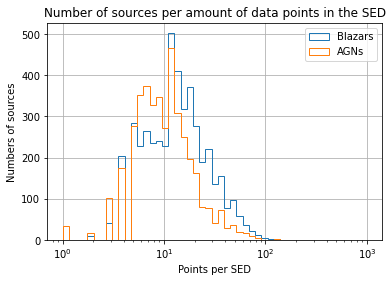

In [49]:
#plot of SED Builder data
histData(point_sed_bl,point_sed_agn)

In [50]:
# plotting the SEDs of all files to see how the points are distributed

def sedDistribution(sed_data_all,mode):
    ''' Plot of the SED files.
    
    Parameters
    ----------
        
    sed_data_all: tupla
                Full dataset with freq e flux like seddata_all_***
    
    mode: boolean
        'True' stands for blazar and 'False' for AGNs
    '''
    plt.figure()
    if mode:
        plt.title('Superimposed Plot of the SED of the entire Blazars dataset')
    else:
        plt.title('Superimposed Plot of the SED of the entire AGNs dataset')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel(r'$\nu F_{\nu} (erg/cm^2/s)$')
    plt.grid(True)
    for sed in sed_data_all:
        freq= sed[0]
        flux= sed[1]
        plt.loglog(freq, flux, 'b.', markersize=1)
    plt.show()

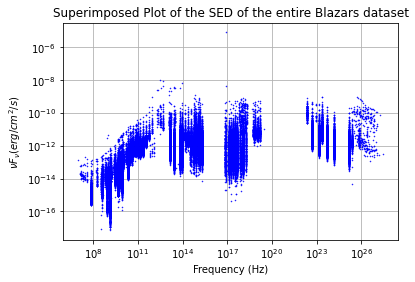

In [51]:
sedDistribution(seddata_all_bl,True)

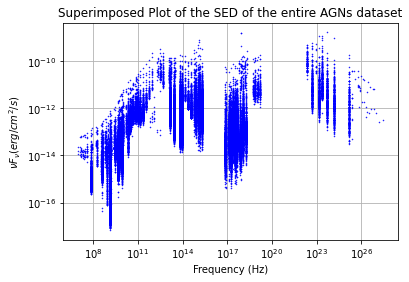

In [52]:
sedDistribution(seddata_all_agn, False)

In [53]:
#Scatter plot of the SED files with color map for the recurrent point

def sedColormapPlot(sed_data_all,mode):
    ''' Scatter plot of the SED files with color map for the recurrent point
    
    Parameters
    ----------
            
    sed_data_all: tupla
                Full dataset with freq e flux like seddata_all_***
    
    mode: boolean
        'True' stands for blazar and 'False' for AGNs
    '''
    dens = np.zeros((1,3))
    for sed in sed_data_all:
        freq= sed[0]
        flux= sed[1]
        # With the ndarray dens I count how many times in total I have the same freq/flux measurement
        # The third column of the array tells us the number of times the measurement is repeated in the whole dataset.
        for i in range(len(freq)):
            if np.size(np.where(np.logical_and(dens[:,0] == freq[i], dens[:,1] == flux[i]))[0]) > 0:
                dens[np.where(np.logical_and(dens[:,0] == freq[i], dens[:,1] == flux[i]))[0],2] += 1
            else:
                dens = np.vstack([dens,[freq[i],flux[i],1]])
    densn = np.delete(dens,(0),axis=0)                              #remove the first line of zeros
    
    plt.figure()
    fig,ax = plt.subplots()
    if mode:
        fig.suptitle('Density plots of the SEDs of Blazars data set')
    else:
        fig.suptitle('Density plots of the SEDs of AGNs data set')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel(r'$\nu F_{\nu} (erg/cm^2/s)$')
    ax.grid(False)
    ax.set_xscale('log')
    ax.set_yscale('log')
    im = ax.scatter(densn[:,0],densn[:,1], c = densn[:,2], cmap ='viridis',marker='.', alpha=0.5)
    fig.colorbar(im, ax=ax)
    plt.show()

<Figure size 432x288 with 0 Axes>

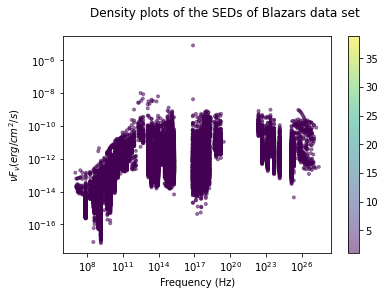

In [54]:
#plot of SED Builder data
sedColormapPlot(seddata_all_bl,True)

<Figure size 432x288 with 0 Axes>

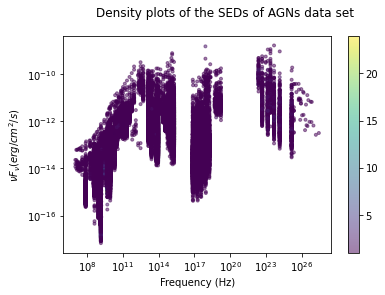

In [55]:
#Plot of SED Builder Data
sedColormapPlot(seddata_all_agn, False)

In [56]:
# Hist2D of the SEDs in our blazars data set
# freq_all e flux_all sono array con tutte le coppie di dati del dataset anche ripetute
def hist2dSed(freq_all,flux_all,mode):
    '''Hist2D of the SEDs of the entire data set.
    
    Parameters
    ----------
    
    freq_all,flux_all: 1D-array
                        all the couple of data of type Blazar or AGNs
    
    mode: boolean
        'True' for Blazars data and 'False' for AGNs data
    '''
    plt.figure()
    if mode:
        plt.title('2D Histogram of the SEDs of Blazars data set')
    else:
        plt.title('2D Histogram of the SEDs of AGNs data set')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel(r'$\nu F_{\nu} (erg/cm^2/s)$')
    plt.grid(False)

    plt.xscale('log')
    plt.yscale('log')

    x_bins = np.logspace(6, 27,200)
    y_bins = np.logspace(-20,-7,200)
    #plt.hist2d(freq_all,flux_all, bins=[x_bins,y_bins], vmin =10, cmap = 'BuPu')
    plt.hist2d(freq_all,flux_all, bins=[x_bins,y_bins], vmin =-10, cmap = 'twilight')
    cb = plt.colorbar()
    cb.set_label('counts in bin')
    plt.show()

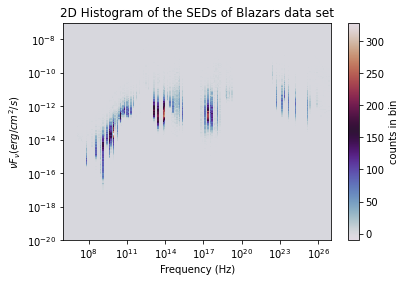

In [57]:
hist2dSed(freq_all_bl,flux_all_bl,True)

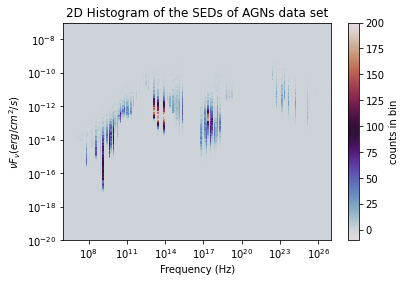

In [58]:
hist2dSed(freq_all_agn,flux_all_agn,False)